In [1]:
train = 'train'
test = 'test'

hindi = 'hindi'
irish = 'irish'
japanese='japanese'
hungarian='hungarian'
punjabi='punjabi'

languages = [hindi, irish, japanese,hungarian,punjabi]
categories = [train, test]

original_dataset_paths = {}

original_dataset_paths[hindi] = '/wsu/home/hc/hc69/hc6943/data/hindi/' # TODO: Adapt this folder!
original_dataset_paths[irish] = '/wsu/home/hc/hc69/hc6943/data/irish/' # TODO: Adapt this folder!
original_dataset_paths[japanese] = '/wsu/home/hc/hc69/hc6943/data/japanese/' # TODO: Adapt this folder!
original_dataset_paths[hungarian] = '/wsu/home/hc/hc69/hc6943/data/hungarian/' # TODO: Adapt this folder!
original_dataset_paths[punjabi] = '/wsu/home/hc/hc69/hc6943/data/punjabi/' # TODO: Adapt this folder!

target_root_path = '/wsu/home/hc/hc69/hc6943/'

num_files_to_take_for_each_language = 100
train_rate = 0.8  # Use 80 % of the data for training and the rest for testing

In [2]:
import os

for lang in languages:
    if not os.path.isdir(original_dataset_paths[lang]):
        raise
    for category in categories:
        if not os.path.isdir(target_root_path + category + '/' + lang):
            raise

for lang in languages:
    if not os.path.isfile(original_dataset_paths[lang] + 'validated.tsv'):
        raise
    if not os.path.isdir(original_dataset_paths[lang] + 'clips'):
        raise

In [3]:
import librosa as lr
from glob import glob
from random import shuffle
from shutil import copy2
import numpy as np
import pandas as pd
import warnings

In [4]:
def copy_audio_files_for_language(lang):
    
    print('')
    print('Copying files for language ' + lang + '...')
    print('')
    
    # Only take validated speech data
    df = pd.read_csv(original_dataset_paths[lang] + 'validated.tsv', sep='\t')
    all_filenames = df['path'].tolist()
    shuffle(all_filenames)
    
    counter = 0
    
    category = train    
    
    # Process files
    for filename in all_filenames:
        file = original_dataset_paths[lang] + 'clips/' + filename
        try:
            audio_segment, sample_rate = lr.load(file)
            if np.count_nonzero(audio_segment) == 0:
                raise Exception('Audio is silent!')
            if audio_segment.ndim != 1:
                raise Exception('Audio signal has wrong number of dimensions: ' + str(audio_segment.ndim))
            duration_sec = lr.core.get_duration(audio_segment, sr=sample_rate)
        except Exception as e:
            print('WARNING! Error while loading file \"' + file + '\": ' + str(e) + ' - Skipping...')
            continue
        
        # Only copy audio files with a certain minimum duration
        if 0 < duration_sec < 10.0:
            copy2(file, target_root_path + category + '/' + lang)
            counter += 1
        
        # Stop after collecting enough files
        if counter == int(num_files_to_take_for_each_language * train_rate):
            category = test
        if counter == num_files_to_take_for_each_language:
            break

In [5]:
warnings.simplefilter('ignore', UserWarning)

copy_audio_files_for_language(irish)

warnings.simplefilter('ignore', UserWarning)


Copying files for language irish...

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19817895.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19817895.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20815307.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20815307.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20742548.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20742548.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22718376.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22718376.mp3' - Skipping...
WARNING! Error while loading file 

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20190629.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20190629.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073379.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073379.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20412327.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20412327.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22288152.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22288152.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21543202.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21543202.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22794663.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22794663.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22273139.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22273139.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22783987.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22783987.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21666694.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21666694.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21996663.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21996663.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22411847.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22411847.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19817905.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19817905.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23346626.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23346626.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20116197.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20116197.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22732667.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22732667.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074394.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074394.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20841555.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20841555.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20853298.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20853298.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22527738.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22527738.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22437976.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22437976.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22240549.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22240549.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22262978.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22262978.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19907196.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19907196.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20853370.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20853370.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20185802.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20185802.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19779373.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19779373.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20853672.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20853672.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22272594.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22272594.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22793886.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22793886.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22198062.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22198062.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21647125.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21647125.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22275367.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22275367.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20853080.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20853080.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22311346.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22311346.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20079846.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20079846.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21461732.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21461732.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20721347.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20721347.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21566849.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21566849.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20116179.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20116179.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20198201.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20198201.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22120610.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22120610.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20184227.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20184227.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22384697.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22384697.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073913.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073913.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20838243.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20838243.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21567203.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21567203.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20184361.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20184361.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23238362.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23238362.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20289936.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20289936.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20756294.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20756294.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20413380.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20413380.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22307368.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22307368.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20190616.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20190616.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19763998.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19763998.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20919659.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20919659.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21567892.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21567892.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22739726.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22739726.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22732676.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22732676.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23874898.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23874898.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22451476.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22451476.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22331368.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22331368.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22240505.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22240505.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19865587.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19865587.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22766646.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22766646.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22297712.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22297712.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20405051.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20405051.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22794672.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22794672.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074600.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074600.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20853060.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20853060.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20101937.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20101937.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074278.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074278.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074048.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074048.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22766596.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22766596.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22723159.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22723159.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22793878.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22793878.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20190646.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20190646.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20072702.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20072702.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21611140.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21611140.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22342565.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22342565.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21611249.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21611249.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20967483.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20967483.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23650280.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23650280.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21595346.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21595346.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19786013.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19786013.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22635881.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22635881.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21560643.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21560643.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19683091.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19683091.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22022122.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22022122.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22712435.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22712435.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073705.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073705.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20097422.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20097422.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22783752.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22783752.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20184217.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20184217.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20204411.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20204411.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22191861.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22191861.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073046.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073046.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073075.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073075.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20887610.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20887610.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22700553.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22700553.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21567754.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21567754.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074846.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074846.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22373945.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22373945.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20072965.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20072965.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20037234.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20037234.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22790745.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22790745.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22777654.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22777654.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23645995.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23645995.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22116606.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22116606.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20404729.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20404729.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21788028.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21788028.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22467220.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22467220.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21560761.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21560761.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21568087.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21568087.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074110.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074110.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20054552.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20054552.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20468140.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20468140.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22344165.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22344165.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20756163.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20756163.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20184324.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20184324.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20727573.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20727573.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22712487.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22712487.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21090692.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21090692.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19907198.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19907198.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20704573.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20704573.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19786017.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19786017.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22324848.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22324848.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20815359.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20815359.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20661949.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20661949.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22739702.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22739702.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20303251.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20303251.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20102218.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20102218.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22635928.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22635928.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20817428.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20817428.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074469.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074469.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19779355.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19779355.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20742454.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20742454.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20841687.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20841687.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20116142.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20116142.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19682729.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19682729.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074653.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074653.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074562.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074562.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22726625.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22726625.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073936.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073936.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22739709.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22739709.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20754790.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20754790.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074308.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074308.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20847233.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20847233.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22732805.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22732805.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22067595.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22067595.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22272597.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22272597.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22198049.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22198049.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20092896.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20092896.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22512974.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22512974.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22077299.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22077299.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19682322.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19682322.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20461165.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20461165.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23634204.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23634204.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22240592.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22240592.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23919611.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23919611.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19682929.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19682929.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21461758.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21461758.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22247896.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22247896.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22777800.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22777800.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22452458.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22452458.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22411838.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22411838.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22335235.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22335235.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22249211.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22249211.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23889817.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_23889817.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20190613.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20190613.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22726940.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22726940.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20023552.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20023552.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073785.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20073785.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20742551.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20742551.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22253295.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22253295.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20425582.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20425582.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22279069.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22279069.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22316729.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22316729.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22457321.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22457321.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20068885.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20068885.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20184280.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20184280.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074831.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20074831.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22732778.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22732778.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20967521.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20967521.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22527740.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22527740.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22273149.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22273149.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21568297.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21568297.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22244883.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22244883.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19682819.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19682819.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20853257.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20853257.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22198105.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22198105.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19682962.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_19682962.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20184316.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20184316.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21568112.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_21568112.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20277622.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_20277622.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22790739.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22790739.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22732788.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/irish/clips/common_voice_ja_22732788.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/irish/c

In [6]:
warnings.simplefilter('ignore', UserWarning)

copy_audio_files_for_language(japanese)

warnings.simplefilter('ignore', UserWarning)


Copying files for language japanese...

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17693612.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17693612.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17688164.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17688164.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18200614.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18200614.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638652.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638652.mp

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18202526.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18202526.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182454.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182454.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18254887.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18254887.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184143.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184143.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734769.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734769.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18930030.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18930030.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18188506.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18188506.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182023.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182023.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17449514.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17449514.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182269.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182269.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18239206.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18239206.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17771026.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17771026.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17635779.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17635779.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_20710711.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_20710711.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17576784.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17576784.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18186843.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18186843.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17681785.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17681785.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17649500.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17649500.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17558922.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17558922.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18941829.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18941829.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734745.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734745.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586900.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586900.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17731905.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17731905.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17579912.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17579912.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17584213.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17584213.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18189739.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18189739.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18188503.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18188503.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18124458.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18124458.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17796001.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17796001.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17690047.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17690047.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18202522.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18202522.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182419.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182419.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18189728.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18189728.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183508.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183508.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17558904.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17558904.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17688530.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17688530.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17625337.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17625337.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17570031.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17570031.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17449479.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17449479.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265287.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265287.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265265.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265265.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182881.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182881.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18943345.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18943345.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18186308.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18186308.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17616706.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17616706.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184332.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184332.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_19053237.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_19053237.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17580294.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17580294.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17449459.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17449459.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17687644.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17687644.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736677.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736677.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736172.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736172.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18930090.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18930090.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182558.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182558.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17643446.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17643446.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18921096.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18921096.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17681820.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17681820.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182267.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182267.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183178.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183178.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_20660655.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_20660655.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638269.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638269.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17621591.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17621591.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182025.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182025.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736639.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736639.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_22930128.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_22930128.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182114.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182114.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17644125.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17644125.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17625569.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17625569.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17570044.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17570044.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736627.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736627.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182054.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182054.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734687.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734687.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586607.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586607.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17687675.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17687675.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181664.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181664.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_21267539.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_21267539.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17690057.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17690057.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182753.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182753.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17689082.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17689082.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17663733.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17663733.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18953336.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18953336.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18953317.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18953317.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17582210.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17582210.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638445.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638445.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17449476.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17449476.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_19024899.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_19024899.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184391.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184391.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184146.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184146.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183217.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183217.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17899129.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17899129.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265242.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265242.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17687640.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17687640.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17663535.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17663535.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181637.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181637.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17625571.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17625571.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638189.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638189.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18239209.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18239209.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17674939.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17674939.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17684717.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17684717.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18929854.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18929854.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18114285.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18114285.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17689111.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17689111.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586512.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586512.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17632204.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17632204.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18202504.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18202504.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183280.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183280.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17576779.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17576779.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18188325.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18188325.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734772.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734772.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182899.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182899.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18200623.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18200623.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736157.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736157.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17658201.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17658201.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_20710704.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_20710704.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184147.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184147.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184426.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184426.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17449488.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17449488.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_20287655.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_20287655.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_19117844.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_19117844.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183715.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183715.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17523194.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17523194.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18953302.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18953302.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586551.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586551.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181952.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181952.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638426.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638426.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17571522.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17571522.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183206.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183206.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586892.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586892.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17684670.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17684670.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183840.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183840.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17687649.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17687649.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17616701.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17616701.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18629874.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18629874.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17625591.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17625591.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638632.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638632.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17659951.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17659951.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183791.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183791.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17689120.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17689120.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_21325583.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_21325583.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638368.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638368.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184415.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184415.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17684707.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17684707.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18239185.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18239185.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184827.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184827.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17583211.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17583211.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17576788.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17576788.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182912.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182912.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18202491.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18202491.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17523197.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17523197.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17649491.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17649491.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18188332.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18188332.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17687746.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17687746.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17523505.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17523505.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17570076.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17570076.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18930085.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18930085.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17622251.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17622251.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265216.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265216.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18188489.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18188489.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184337.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184337.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182490.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182490.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_19117856.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_19117856.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183809.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183809.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17685867.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17685867.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181975.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181975.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181618.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181618.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17919582.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17919582.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181906.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181906.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17546226.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17546226.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181819.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181819.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184287.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184287.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184321.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18184321.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736616.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736616.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_19053182.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_19053182.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638136.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638136.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17616705.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17616705.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18930172.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18930172.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17584130.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17584130.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18941837.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18941837.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17558923.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17558923.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17584241.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17584241.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_20649500.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_20649500.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18921386.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18921386.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182459.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182459.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17658212.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17658212.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181947.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18181947.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183265.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183265.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18941858.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18941858.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183364.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183364.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17684688.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17684688.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18239183.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18239183.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182488.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182488.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17622329.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17622329.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265245.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265245.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17632200.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17632200.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586606.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586606.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736630.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736630.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183716.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183716.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265276.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265276.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17684687.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17684687.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17546223.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17546223.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18188144.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18188144.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17585035.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17585035.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18953322.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18953322.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17580291.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17580291.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17731891.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17731891.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18165119.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18165119.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17585022.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17585022.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586476.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17586476.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18202511.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18202511.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183675.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18183675.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17796007.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17796007.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182302.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182302.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638647.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638647.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18953333.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18953333.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638433.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17638433.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18200617.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18200617.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182843.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182843.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736684.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17736684.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18114283.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18114283.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17681834.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17681834.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17449493.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17449493.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734768.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734768.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18186785.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18186785.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18363584.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18363584.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265246.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18265246.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734732.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734732.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734731.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17734731.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17622313.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17622313.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182522.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18182522.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18202508.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_18202508.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_19822059.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_19822059.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17444714.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/japanese/clips/common_voice_ga-IE_17444714.mp3' - Skipping...
WARNING! Error while loa

In [7]:
warnings.simplefilter('ignore', UserWarning)

copy_audio_files_for_language(hungarian)

warnings.simplefilter('ignore', UserWarning)


Copying files for language hungarian...

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549326.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549326.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632221.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632221.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23235989.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23235989.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794224.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794224.mp3' - Skipping..

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637749.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637749.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629323.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629323.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735192.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735192.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791994.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791994.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23309125.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23309125.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23528793.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23528793.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629305.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629305.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629400.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629400.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629468.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629468.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674528.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674528.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632104.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632104.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23744069.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23744069.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637544.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637544.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23718097.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23718097.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634722.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634722.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23659020.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23659020.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23745030.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23745030.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23863767.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23863767.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23744210.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23744210.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794201.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794201.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796389.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796389.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629332.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629332.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631211.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631211.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734808.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734808.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735202.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735202.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796808.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796808.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23647529.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23647529.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735269.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735269.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549028.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549028.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632069.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632069.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549341.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549341.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390388.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390388.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630676.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630676.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356237.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356237.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599685.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599685.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794245.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794245.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23340930.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23340930.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637277.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637277.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637975.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637975.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689687.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689687.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23663629.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23663629.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631162.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631162.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23854356.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23854356.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796804.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796804.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23664449.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23664449.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23664239.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23664239.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635073.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635073.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629788.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629788.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734881.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734881.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637247.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637247.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674426.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674426.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734810.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734810.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630900.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630900.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630858.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630858.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23745002.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23745002.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23680427.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23680427.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387748.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387748.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632276.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632276.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629809.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629809.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23659318.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23659318.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387855.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387855.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23145219.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23145219.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631962.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631962.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794226.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794226.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23685827.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23685827.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599715.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599715.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23658816.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23658816.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631406.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631406.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23554723.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23554723.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629364.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629364.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637234.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637234.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23744071.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23744071.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637563.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637563.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23647597.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23647597.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794181.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794181.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23564429.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23564429.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23790683.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23790683.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734890.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734890.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791876.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791876.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689676.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689676.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632204.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632204.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631064.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631064.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637412.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637412.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632027.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632027.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549270.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549270.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23644830.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23644830.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599706.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599706.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674572.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674572.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23234332.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23234332.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794324.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794324.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23636704.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23636704.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794174.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794174.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635919.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635919.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632168.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632168.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23619822.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23619822.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637566.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637566.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637246.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637246.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23744992.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23744992.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23781424.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23781424.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356282.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356282.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734712.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734712.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23548917.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23548917.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23659104.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23659104.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356550.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356550.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631884.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631884.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23145098.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23145098.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629496.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629496.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689674.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689674.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629641.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629641.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631789.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631789.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387805.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387805.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791999.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791999.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735329.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735329.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689719.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689719.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23555165.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23555165.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23592687.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23592687.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635924.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635924.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599684.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599684.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599720.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599720.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23792172.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23792172.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23743966.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23743966.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387882.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387882.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23307863.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23307863.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23745103.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23745103.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634773.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634773.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23790652.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23790652.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23792007.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23792007.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387919.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387919.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23564477.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23564477.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629326.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629326.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356406.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356406.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631796.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631796.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631942.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631942.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796801.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796801.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791875.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791875.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791765.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791765.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632178.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632178.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390424.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390424.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631785.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631785.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794170.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794170.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632015.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632015.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23743989.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23743989.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689635.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689635.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23649631.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23649631.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637333.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637333.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23781363.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23781363.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23680449.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23680449.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635071.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635071.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23790695.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23790695.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796649.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796649.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23529409.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23529409.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794272.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794272.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23792068.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23792068.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23664417.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23664417.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23335339.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23335339.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23554736.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23554736.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632130.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632130.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631787.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631787.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23645041.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23645041.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630403.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630403.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794238.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794238.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23745121.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23745121.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637337.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637337.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23619861.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23619861.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23790716.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23790716.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23744938.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23744938.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549008.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549008.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824783.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824783.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23405161.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23405161.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23644922.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23644922.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387746.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387746.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791822.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791822.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635539.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635539.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791850.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791850.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794095.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794095.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629351.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629351.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23745033.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23745033.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637241.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637241.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23335342.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23335342.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632244.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632244.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631438.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631438.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631790.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631790.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637695.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637695.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637229.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637229.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631101.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631101.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23613671.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23613671.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631719.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631719.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23658783.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23658783.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23405159.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23405159.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23345533.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23345533.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23340720.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23340720.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23645066.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23645066.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23644949.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23644949.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631957.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631957.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23548892.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23548892.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390409.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390409.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23619906.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23619906.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23638140.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23638140.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23555147.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23555147.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23672656.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23672656.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632024.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632024.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791917.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791917.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634771.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634771.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794392.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794392.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549081.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549081.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632202.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632202.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23639599.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23639599.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634568.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634568.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791920.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791920.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390387.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390387.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23341747.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23341747.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629354.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629354.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23745096.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23745096.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23529721.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23529721.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637283.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637283.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631328.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631328.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791906.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791906.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23235961.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23235961.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23405173.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23405173.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23340918.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23340918.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387700.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387700.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674445.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674445.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356725.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356725.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735195.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735195.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23844121.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23844121.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356679.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356679.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824834.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824834.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390448.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390448.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637873.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637873.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631413.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631413.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634656.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634656.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631806.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631806.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23619849.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23619849.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824831.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824831.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23672619.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23672619.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23703381.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23703381.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23554763.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23554763.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630475.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630475.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23145076.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23145076.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630594.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630594.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631995.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631995.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23680401.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23680401.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631287.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631287.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796317.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796317.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549288.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549288.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796631.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796631.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23136695.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23136695.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356497.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356497.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632153.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632153.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23831537.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23831537.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631932.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631932.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356421.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356421.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23529525.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23529525.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23790680.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23790680.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629344.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629344.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689633.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689633.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794019.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794019.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23658790.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23658790.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634758.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634758.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632263.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632263.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599787.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599787.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23564481.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23564481.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634580.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634580.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631468.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631468.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23644876.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23644876.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674551.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674551.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635169.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635169.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637611.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637611.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637374.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637374.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734875.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734875.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23664321.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23664321.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674618.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674618.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637764.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637764.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674487.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674487.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637355.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637355.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23530441.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23530441.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794391.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794391.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632285.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632285.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629377.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629377.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824761.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824761.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23340728.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23340728.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796787.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796787.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637527.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637527.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631943.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631943.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632098.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632098.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23234377.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23234377.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674777.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674777.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631289.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631289.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23548802.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23548802.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23340696.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23340696.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629316.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629316.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356691.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356691.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23136698.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23136698.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824756.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824756.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23647629.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23647629.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23235923.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23235923.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23688084.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23688084.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23649777.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23649777.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599747.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599747.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23680336.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23680336.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390371.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390371.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23680330.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23680330.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637423.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637423.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23781351.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23781351.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23564461.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23564461.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23529611.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23529611.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637518.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637518.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734696.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734696.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629371.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629371.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23790739.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23790739.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791957.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791957.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796298.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796298.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23564468.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23564468.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637298.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637298.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637223.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637223.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630692.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630692.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356617.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356617.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23619857.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23619857.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23744958.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23744958.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631945.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631945.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356251.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23356251.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824712.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824712.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635172.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635172.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735298.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735298.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390412.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390412.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23644869.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23644869.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631081.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631081.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629341.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629341.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637258.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637258.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689738.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23689738.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23781362.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23781362.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630657.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630657.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637619.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637619.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23340717.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23340717.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637830.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637830.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23554761.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23554761.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390381.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390381.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674390.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23674390.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632294.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632294.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794135.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794135.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734858.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23734858.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631358.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631358.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23685976.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23685976.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23703390.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23703390.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637317.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637317.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637747.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637747.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549006.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549006.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23145103.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23145103.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23664210.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23664210.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794051.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794051.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635926.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635926.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637352.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637352.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599739.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599739.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824818.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23824818.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794321.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794321.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23619838.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23619838.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637899.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637899.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631991.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631991.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796686.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23796686.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631493.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631493.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23733654.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23733654.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632385.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632385.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791939.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23791939.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635067.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23635067.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23680466.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23680466.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631314.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631314.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23529323.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23529323.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630402.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23630402.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390359.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23390359.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23405154.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23405154.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735188.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23735188.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599757.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23599757.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23555027.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23555027.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794060.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794060.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387795.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23387795.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637276.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23637276.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794292.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23794292.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631141.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23631141.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632268.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632268.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23718093.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23718093.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549311.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23549311.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_24014743.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_24014743.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634759.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23634759.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23658908.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23658908.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23863806.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23863806.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629786.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23629786.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632205.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23632205.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23854123.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hungarian/clips/common_voice_hu_23854123.mp3' - Skipping...
WARNING! Error while loading file "/wsu/

In [8]:
warnings.simplefilter('ignore', UserWarning)

copy_audio_files_for_language(punjabi)

warnings.simplefilter('ignore', UserWarning)


Copying files for language punjabi...

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22991882.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22991882.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22929908.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22929908.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22953708.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22953708.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22952849.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22952849.mp3' - Skip

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_23355451.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_23355451.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22936667.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22936667.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_23355476.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_23355476.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22929969.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22929969.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22991400.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22991400.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22929950.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22929950.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22991403.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22991403.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22929564.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22929564.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22929967.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22929967.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_23122967.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_23122967.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22952882.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22952882.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22936734.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/punjabi/clips/common_voice_pa-IN_22936734.mp3' - Skipping...
WARNING! Error while loading fil

In [9]:
warnings.simplefilter('ignore', UserWarning)

copy_audio_files_for_language(hindi)

warnings.simplefilter('ignore', UserWarning)


Copying files for language hindi...

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23847550.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23847550.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23844537.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23844537.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23852764.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23852764.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23852791.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23852791.mp3' - Skipping...
WARNING! Error while loading file 

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23849317.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23849317.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23833334.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23833334.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23833331.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23833331.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23849305.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23849305.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23964503.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23964503.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23852768.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23852768.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23833319.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23833319.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23964498.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23964498.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/c

WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23964614.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23964614.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23849346.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23849346.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23937113.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23937113.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23839863.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc69/hc6943/data/hindi/clips/common_voice_hi_23839863.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc69/hc6943/data/hindi/c

In [10]:
for category in categories:
    
    if category == train:
        num_files = int(num_files_to_take_for_each_language * train_rate)
    else:
        num_files = int(num_files_to_take_for_each_language * (1.0 - train_rate))
        
    for lang in languages:
        folder = target_root_path + category + '/' + lang + '/'
        all_files = glob(folder + '*.mp3')
        
        if len(all_files) < (num_files - 1):
            raise Exception('Folder \"' + folder + '\" only contains ' + str(len(all_files)) + ' files instead of ' + str(num_files) + '!')
            
print('Okay!')

Okay!


In [11]:
warnings.simplefilter('ignore', UserWarning)

for category in categories:
    for lang in languages:
        duration_sec = 0.0
        
        folder = target_root_path + category + '/' + lang + '/'
        all_files = glob(folder + '*.mp3')
        
        for file in all_files:
            duration_sec += lr.core.get_duration(filename=file)
            
        duration_h = duration_sec / 60.0 / 60.0
        print('Total duration of ' + lang + ' ' + category + ' is ' + str(round(duration_h, 1)) + ' h')
        
warnings.simplefilter('default', UserWarning)

Total duration of hindi train is 0.2 h
Total duration of irish train is 0.2 h
Total duration of japanese train is 0.1 h
Total duration of hungarian train is 0.1 h
Total duration of punjabi train is 0.2 h
Total duration of hindi test is 0.1 h
Total duration of irish test is 0.1 h
Total duration of japanese test is 0.0 h
Total duration of hungarian test is 0.0 h
Total duration of punjabi test is 0.0 h


In [12]:
dataset_root_path = '/wsu/home/hc/hc69/hc6943/'


image_width = 500
image_height = 128

augment_data_factor = 1.0 # Set-up how much of the training data should be augmented

In [13]:
import os
import librosa as lr
from librosa.display import waveplot
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
from IPython.display import Audio
import soundfile as sf

In [14]:
def load_audio_file(audio_file_path):
    warnings.simplefilter('ignore', UserWarning)
    
    audio_segment, sample_rate = lr.load(audio_file_path)
    return audio_segment, sample_rate

    warnings.simplefilter('default', UserWarning)

In [15]:
def add_noise(audio_segment, gain):
    num_samples = audio_segment.shape[0]
    noise = gain * np.random.normal(size=num_samples)
    return audio_segment + noise

In [16]:
audio_files = {}

for lang in languages:
    for category in categories:
        audio_files[lang + '.' + category] = glob(dataset_root_path + category + '/' + lang + '/*.mp3')

print(audio_files.keys())

dict_keys(['hindi.train', 'hindi.test', 'irish.train', 'irish.test', 'japanese.train', 'japanese.test', 'hungarian.train', 'hungarian.test', 'punjabi.train', 'punjabi.test'])


In [17]:
key = list(audio_files.keys())[1]
audio_file = audio_files[key][1]
audio_file

'/wsu/home/hc/hc69/hc6943/test/hindi/common_voice_hi_23830518.mp3'

In [18]:
audio, sample_rate = load_audio_file(audio_file)

Audio(audio, rate=sample_rate)

In [19]:
audio_segment_with_noise = add_noise(audio, 0.005)

Audio(audio_segment_with_noise, rate=sample_rate)

In [20]:
def augment_audio_file_with_noise(audio_file_path):
    audio_segment, sample_rate = load_audio_file(audio_file_path)
    audio_segment_with_noise = add_noise(audio_segment, 0.005)
    audio_file_path_without_extension = os.path.splitext(audio_file_path)[0]
    augmented_audio_file_path = audio_file_path_without_extension + '_augmented_noise.wav'
    sf.write(augmented_audio_file_path, audio_segment_with_noise, sample_rate)

In [21]:
for lang in languages:
    category = train
        
    all_audio_files = audio_files[lang + '.' + category]
        
    num_files = int(len(all_audio_files) * augment_data_factor)

    for i in range(num_files):
        if i % (num_files / 10) == 0:
            print('Still processing ' + lang + ' ' + category + ' ' + str(i) + '/' + str(num_files))
        augment_audio_file_with_noise(all_audio_files[i])

Still processing hindi train 0/173
Still processing irish train 0/146
Still processing japanese train 0/112
Still processing hungarian train 0/121
Still processing punjabi train 0/120
Still processing punjabi train 12/120
Still processing punjabi train 24/120
Still processing punjabi train 36/120
Still processing punjabi train 48/120
Still processing punjabi train 60/120
Still processing punjabi train 72/120
Still processing punjabi train 84/120
Still processing punjabi train 96/120
Still processing punjabi train 108/120


In [22]:
sample_rate = 8000
image_width = 500
image_height = 128

In [23]:
import os
import librosa as lr
from librosa.display import waveplot
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import imageio
import warnings
from IPython.display import Audio

In [24]:
def load_audio_file(audio_file_path):
    warnings.simplefilter('ignore', UserWarning)
    
    audio_segment, _ = lr.load(audio_file_path, sr=sample_rate)
    return audio_segment

    warnings.simplefilter('default', UserWarning)

In [25]:
def fix_audio_segment_to_10_seconds(audio_segment):
    target_len = 10 * sample_rate
    audio_segment = np.concatenate([audio_segment]*3, axis=0)
    audio_segment = audio_segment[0:target_len]
    
    return audio_segment

In [26]:
def spectrogram(audio_segment):
    # Compute mel-scaled spectrogram image
    hl = audio_segment.shape[0] // image_width
    spec = lr.feature.melspectrogram(audio_segment, n_mels=image_height, hop_length=int(hl))

    # Logarithmic amplitudes
    image = lr.core.power_to_db(spec)

    # Convert to numpy matrix
    image_np = np.asmatrix(image)

    # Normalize and scale
    image_np_scaled_temp = (image_np - np.min(image_np))
    
    image_np_scaled = image_np_scaled_temp / np.max(image_np_scaled_temp)

    return image_np_scaled[:, 0:image_width]

In [27]:
def to_integer(image_float):
    # range (0,1) -> (0,255)
    image_float_255 = image_float * 255.
    
    # Convert to uint8 in range [0:255]
    image_int = image_float_255.astype(np.uint8)
    
    return image_int

In [28]:
audio_files = {}

for lang in languages:
    for category in categories:
        dataset_path = dataset_root_path + category + '/' + lang
        
        # If you wish to preprocess all data use the following command
        audio_files[lang + '.' + category] = glob(dataset_path + '/*.mp3') + glob(dataset_path + '/*.wav')
        
        # If you only wish to preprocess augmented data use the following command
        #audio_files[lang + '.' + category] = glob(dataset_path + '/*.wav')

print(audio_files.keys())

dict_keys(['hindi.train', 'hindi.test', 'irish.train', 'irish.test', 'japanese.train', 'japanese.test', 'hungarian.train', 'hungarian.test', 'punjabi.train', 'punjabi.test'])


In [29]:
key = list(audio_files.keys())[0]
audio_file = audio_files[key][0]
audio_file

'/wsu/home/hc/hc69/hc6943/train/hindi/common_voice_hi_23833315.mp3'

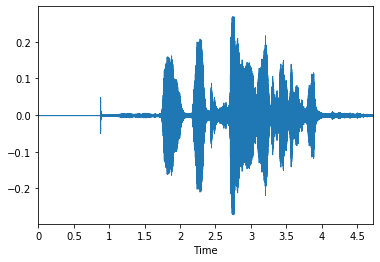

In [30]:
audio = load_audio_file(audio_file)

waveplot(audio, sr=sample_rate)
plt.show()

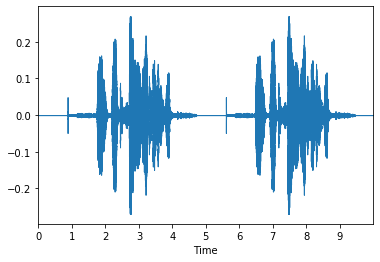

In [31]:
audio_fixed = fix_audio_segment_to_10_seconds(audio)

waveplot(audio_fixed, sr=sample_rate)
plt.show()

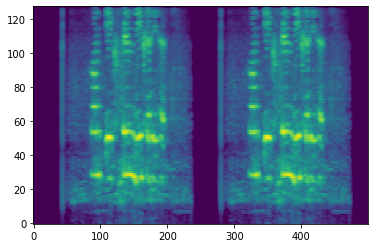

In [32]:
spectro = spectrogram(audio_fixed)

plt.imshow(spectro, origin='lower', aspect='auto')
plt.show()

In [33]:
spectro.shape

(128, 500)

In [34]:
def audio_to_image_file(audio_file):
    out_image_file = audio_file + '.png'
    audio = load_audio_file(audio_file)
    audio_fixed = fix_audio_segment_to_10_seconds(audio)
    if np.count_nonzero(audio_fixed) != 0:
        spectro = spectrogram(audio_fixed)
        spectro_int = to_integer(spectro)
        imageio.imwrite(out_image_file, spectro_int)
    else:
        print('WARNING! Detected an empty audio signal. Skipping...')

In [35]:
for lang in languages:
    for category in categories:
        all_audio_files = audio_files[lang + '.' + category]
        
        num_files = len(all_audio_files)
        
        for i in range(num_files):
            if i % (num_files / 50) == 0:
                print('Still processing ' + lang + ' ' + category + ' ' + str(i) + '/' + str(num_files))
            audio_to_image_file(all_audio_files[i])

Still processing hindi train 0/346
Still processing hindi test 0/105
Still processing irish train 0/292
Still processing irish test 0/89
Still processing japanese train 0/224
Still processing japanese test 0/40
Still processing hungarian train 0/242
Still processing hungarian test 0/38
Still processing punjabi train 0/240
Still processing punjabi test 0/39


/wsu/home/hc/hc69/hc6943/test/hindi/common_voice_hi_23828716.mp3.png


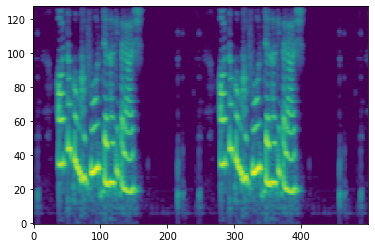

(128, 500)


In [36]:
list_of_image_files = glob(dataset_root_path + test + '/' + hindi + '/*.png')
image_file_path = list_of_image_files[0]

print(image_file_path)

image = imageio.imread(image_file_path)

plt.imshow(image, origin='lower', aspect='auto')
plt.show()

print(image.shape)

In [37]:
audio_file_path = os.path.splitext(image_file_path)[0]

Audio(audio_file_path)

In [38]:
train_path = dataset_root_path + train

batch_size = 20
image_width = 500
image_height = 128

validation_split = 0.1
initial_learning_rate = 0.045

num_classes = len(languages)

model_file = dataset_root_path + 'model_1.h5'

In [39]:
from glob import glob
import math
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [40]:
all_files = glob(train_path + '/*/*.png')

num_validation = len(all_files) * validation_split
num_train = len(all_files) - num_validation

validation_steps = int(num_validation / batch_size)
steps_per_epoch = int(num_train / batch_size)

print('Steps per Epoch: ' + str(steps_per_epoch))
print('Validation steps: ' + str(validation_steps))

Steps per Epoch: 60
Validation steps: 6


In [41]:
image_data_generator = ImageDataGenerator(rescale=1./255, validation_split=validation_split)
train_generator = image_data_generator.flow_from_directory(train_path, batch_size=batch_size, class_mode='categorical', target_size=(image_height, image_width), color_mode='grayscale', subset='training')
validation_generator = image_data_generator.flow_from_directory(train_path, batch_size=batch_size, class_mode='categorical', target_size=(image_height, image_width), color_mode='grayscale', subset='validation')

Found 1211 images belonging to 5 classes.
Found 133 images belonging to 5 classes.


In [42]:
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)

In [43]:
def step_decay(epoch, lr):
    drop = 0.94
    epochs_drop = 2.0
    lrate = lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

learning_rate_decay = LearningRateScheduler(step_decay, verbose=1)

In [44]:
img_input = Input(shape=(image_height, image_width, 1))

img_conc = Concatenate(axis=3, name='input_concat')([img_input, img_input, img_input])

model_1 = InceptionV3(input_tensor=img_conc, weights=None, include_top=True, classes=5)

model_1.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 500, 1) 0                                            
__________________________________________________________________________________________________
input_concat (Concatenate)      (None, 128, 500, 3)  0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 249, 32)  864         input_concat[0][0]               
_______________________________________________________________________________________

In [45]:
model_1.compile(optimizer=RMSprop(lr=initial_learning_rate, clipvalue=2.0), loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import TimeDistributed
inputs=(128,500,1)
model_2 = Sequential()
model_2.add((Conv2D(64, kernel_size=3,activation='relu', input_shape=[128,500,1])))
model_2.add((Conv2D(32, kernel_size=3, activation='relu')))
model_2.add((MaxPooling2D(pool_size=2)))
model_2.add((Flatten()))
# model.add(LSTM(32,  activation='relu',return_sequences=True))
# model.add(LSTM(16, activation='relu', return_sequences=True))
model_2.add((Dense(5)))
# model.build((None,) + inputs)
model_2.compile(optimizer='RMSprop',
              loss='categorical_crossentropy', # Loss
              metrics=['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 126, 498, 64)      640       
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 124, 496, 32)      18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 248, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 492032)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 2460165   
Total params: 2,479,269
Trainable params: 2,479,269
Non-trainable params: 0
_________________________________________________________________


In [47]:
from tensorflow.keras.applications.resnet50 import ResNet50
model_3 = ResNet50(input_tensor=img_conc, weights=None, include_top=True, classes=5)

model_3.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 500, 1) 0                                            
__________________________________________________________________________________________________
input_concat (Concatenate)      (None, 128, 500, 3)  0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 506, 3)  0           input_concat[0][0]               
___________________________________________________________________________________________

In [48]:
model_3.compile(optimizer=RMSprop(lr=initial_learning_rate, clipvalue=2.0), loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers 
model_4 = VGG16(input_tensor=img_conc, # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')


In [50]:
import tensorflow

In [51]:
for layer in model_4.layers:
    layer.trainable = False
    

x = layers.Flatten()(model_4.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(5, activation='sigmoid')(x)

model_4 = tensorflow.keras.models.Model(model_4.input, x)

for i, layer in enumerate(model_4.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 input_concat False
2 block1_conv1 False
3 block1_conv2 False
4 block1_pool False
5 block2_conv1 False
6 block2_conv2 False
7 block2_pool False
8 block3_conv1 False
9 block3_conv2 False
10 block3_conv3 False
11 block3_pool False
12 block4_conv1 False
13 block4_conv2 False
14 block4_conv3 False
15 block4_pool False
16 block5_conv1 False
17 block5_conv2 False
18 block5_conv3 False
19 block5_pool False
20 flatten_1 True
21 dense_1 True
22 dropout True
23 dense_2 True


In [52]:
model_4.compile(optimizer=RMSprop(lr=initial_learning_rate, clipvalue=2.0), loss='categorical_crossentropy', metrics=['accuracy'])


In [53]:
history_1 = model_1.fit(train_generator, validation_data=validation_generator, epochs=30, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, callbacks=[early_stopping, learning_rate_decay])

Epoch 1/30

Epoch 00001: LearningRateScheduler reducing learning rate to 0.04500000178813934.
60/60 [==============================] - 462s 8s/step - loss: 14.2664 - accuracy: 0.1965 - val_loss: 8856431616.0000 - val_accuracy: 0.1667
Epoch 2/30

Epoch 00002: LearningRateScheduler reducing learning rate to 0.042300001680850983.
60/60 [==============================] - 448s 7s/step - loss: 1.8731 - accuracy: 0.2506 - val_loss: 159409664.0000 - val_accuracy: 0.2000
Epoch 3/30

Epoch 00003: LearningRateScheduler reducing learning rate to 0.03976200073957443.
60/60 [==============================] - 447s 7s/step - loss: 1.7098 - accuracy: 0.2893 - val_loss: 3892025600.0000 - val_accuracy: 0.1750
Epoch 4/30

Epoch 00004: LearningRateScheduler reducing learning rate to 0.03513370451182127.
60/60 [==============================] - 474s 8s/step - loss: 1.7606 - accuracy: 0.2639 - val_loss: 211866.0469 - val_accuracy: 0.1917
Epoch 5/30

Epoch 00005: LearningRateScheduler reducing learning rate t

In [54]:
history_2 = model_2.fit(train_generator, validation_data=validation_generator, epochs=30, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, callbacks=[early_stopping, learning_rate_decay])

Epoch 1/30

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
60/60 [==============================] - 295s 5s/step - loss: 8.4149 - accuracy: 0.1730 - val_loss: 11.1483 - val_accuracy: 0.1583
Epoch 2/30

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009400000446476042.
60/60 [==============================] - 299s 5s/step - loss: 9.6354 - accuracy: 0.1574 - val_loss: 11.6856 - val_accuracy: 0.1833
Epoch 3/30

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0008836000529117881.
60/60 [==============================] - 300s 5s/step - loss: 9.5080 - accuracy: 0.1645 - val_loss: 11.0140 - val_accuracy: 0.1500
Epoch 4/30

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0007807489902945235.
60/60 [==============================] - 294s 5s/step - loss: 9.2520 - accuracy: 0.1735 - val_loss: 11.2827 - val_accuracy: 0.1583
Epoch 5/30

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00068986983257345

In [ ]:
history_3 = model_3.fit(train_generator, validation_data=validation_generator, epochs=30, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, callbacks=[early_stopping, learning_rate_decay])

Epoch 1/30

Epoch 00001: LearningRateScheduler reducing learning rate to 0.04500000178813934.
60/60 [==============================] - 840s 14s/step - loss: 25.9840 - accuracy: 0.2124 - val_loss: 4740462.0000 - val_accuracy: 0.1833
Epoch 2/30

Epoch 00002: LearningRateScheduler reducing learning rate to 0.042300001680850983.
60/60 [==============================] - 798s 13s/step - loss: 1.5711 - accuracy: 0.3255 - val_loss: 6277070.0000 - val_accuracy: 0.1833
Epoch 3/30

Epoch 00003: LearningRateScheduler reducing learning rate to 0.03976200073957443.
60/60 [==============================] - 823s 14s/step - loss: 1.4935 - accuracy: 0.3550 - val_loss: 643910.8750 - val_accuracy: 0.2333
Epoch 4/30

Epoch 00004: LearningRateScheduler reducing learning rate to 0.03513370451182127.
60/60 [==============================] - 812s 14s/step - loss: 1.4583 - accuracy: 0.3321 - val_loss: 2019.6000 - val_accuracy: 0.1917
Epoch 5/30

Epoch 00005: LearningRateScheduler reducing learning rate to 0.031

In [ ]:
history_4 = model_4.fit(train_generator, validation_data=validation_generator, epochs=30, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, callbacks=[early_stopping, learning_rate_decay])

In [ ]:
model_3.save(model_file)

In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers
# from kerastuner.tuners import RandomSearch


# def build_model(hp):
#     model = keras.Sequential()
#     model.add(layers.Dense(units=hp.Int('units',
#                                         min_value=32,
#                                         max_value=512,
#                                         step=32),
#                            activation='relu'))
#     model.add(layers.Dense(5, activation='softmax'))
#     model.compile(
#         optimizer=keras.optimizers.Adam(
#             hp.Choice('learning_rate',
#                       values=[1e-2, 1e-3, 1e-4])),
#         loss='binary_crossentropy',
#         metrics=['accuracy'])
#     return model

In [ ]:
# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,
#     executions_per_trial=3)


In [ ]:
# tuner.search(train_generator,
#              epochs=5,
#             validation_data=validation_generator)
            


In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test_path = dataset_root_path + test


In [ ]:
all_files = glob(test_path + '/*/*.png')

num_test = len(all_files)

evaluation_steps = int(num_test / batch_size)

print('Evaluation steps: ' + str(evaluation_steps))

In [ ]:
image_data_generator = ImageDataGenerator(rescale=1./255)
evaluation_generator = image_data_generator.flow_from_directory(test_path, batch_size=batch_size, class_mode='categorical', target_size=(image_height, image_width), color_mode='grayscale')

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model = load_model(model_file)


In [ ]:
_, test_accuracy = model.evaluate(evaluation_generator, steps=evaluation_steps)


In [ ]:
print('Test accuracy: ' + str(round(test_accuracy * 100., 1)) + ' %')


In [ ]:
import moviepy.editor as mp
my_clip = mp.VideoFileClip(r"/wsu/home/hc/hc33/hc3344/langDS/production ID_3999991.mp4")

In [ ]:
my_clip.audio.write_audiofile(r"/wsu/home/hc/hc33/hc3344/langDS/pred/class/my_result.mp3")

In [ ]:
audio_to_image_file(r"/wsu/home/hc/hc33/hc3344/langDS/pred/class/my_result.mp3")

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = image_data_generator.flow_from_directory(directory=r"/wsu/home/hc/hc33/hc3344/langDS/pred/", batch_size=batch_size, class_mode='categorical', target_size=(image_height, image_width), color_mode='grayscale')

In [ ]:
# pip install SpeechRecognition
preds = model.predict_generator(test_generator)
preds_cls_idx = preds.argmax(axis=-1)

In [ ]:
import numpy as np

idx_to_cls = {v: k for k, v in train_generator.class_indices.items()}
preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)
filenames_to_cls = list(zip(test_generator.filenames, preds_cls))

In [ ]:
filenames_to_cls